In [ ]:
import pickle

import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [231]:
hists = []
for i in range(50):
    try:
        with open('results/model_{}.hist'.format(i),"rb") as f:
            hists.append(pickle.load(f))
    except:
        pass
        

print(len(hists))    

45


Model trained the following hyperparameters:
learning_rate: 0.0001
seq_size: 300
batch_size: 30
epochs: 200

Training stats:
biggest training accuracy: 0.937
biggest validation accuracy: 0.901
least training loss: 0.361
least validation loss: 0.476
mean training / validation accuracy difference: 0.047
validation accuracy variance: 0.001


/home/ubuntu/data/installs/miniconda3/envs/dl-python35/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


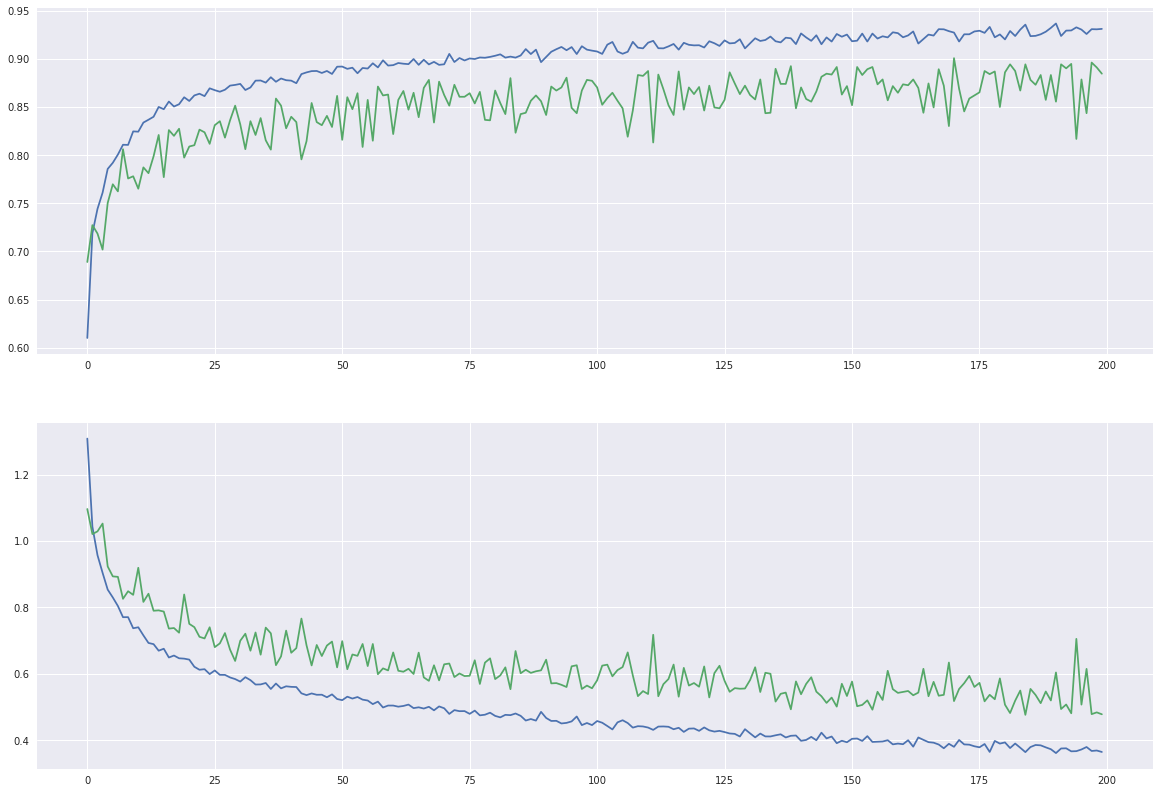

In [251]:

def fit(y, grade=4):
    x = range(len(y))
    x_new = np.linspace(x[0], x[-1], num=len(x)*10)
    coefs = poly.polyfit(x, y, grade)
    ffit = poly.polyval(x_new, coefs)
    return x_new, ffit

def print_history(history):
    hyper = history['hyperparameters']
    hist = history['history']
    print('Model trained the following hyperparameters:')
    print('learning_rate: {}'.format(hyper[0]))
    print('seq_size: {}'.format(int(hyper[1])))
    print('batch_size: {}'.format(int(hyper[2])))
    print('epochs: {}'.format(int(hyper[3])))
    print('\nTraining stats:')
    print('biggest training accuracy: {:.3f}'.format(np.max(hist['acc'])))
    print('biggest validation accuracy: {:.3f}'.format(np.max(hist['val_acc'])))
    print('least training loss: {:.3f}'.format(np.min(hist['loss'])))
    print('least validation loss: {:.3f}'.format(np.min(hist['val_loss'])))
    print('mean training / validation accuracy difference: {:.3f}'.format(np.mean(hist['acc']) - np.mean(hist['val_acc'])))
    print('validation accuracy variance: {:.3f}'.format(np.var(hist['val_acc'])))

    plt.figure(1, figsize=(20, 14))
    plt.subplot(211)
    plt.plot(hist['acc'])
    plt.plot(hist['val_acc'])
#     plt.plot(*fit(hist['val_acc']))

    plt.subplot(212)
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
#     plt.plot(*fit(hist['val_loss']))
    plt.show()

print_history(hists[18])
    
    

/home/ubuntu/data/installs/miniconda3/envs/dl-python35/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


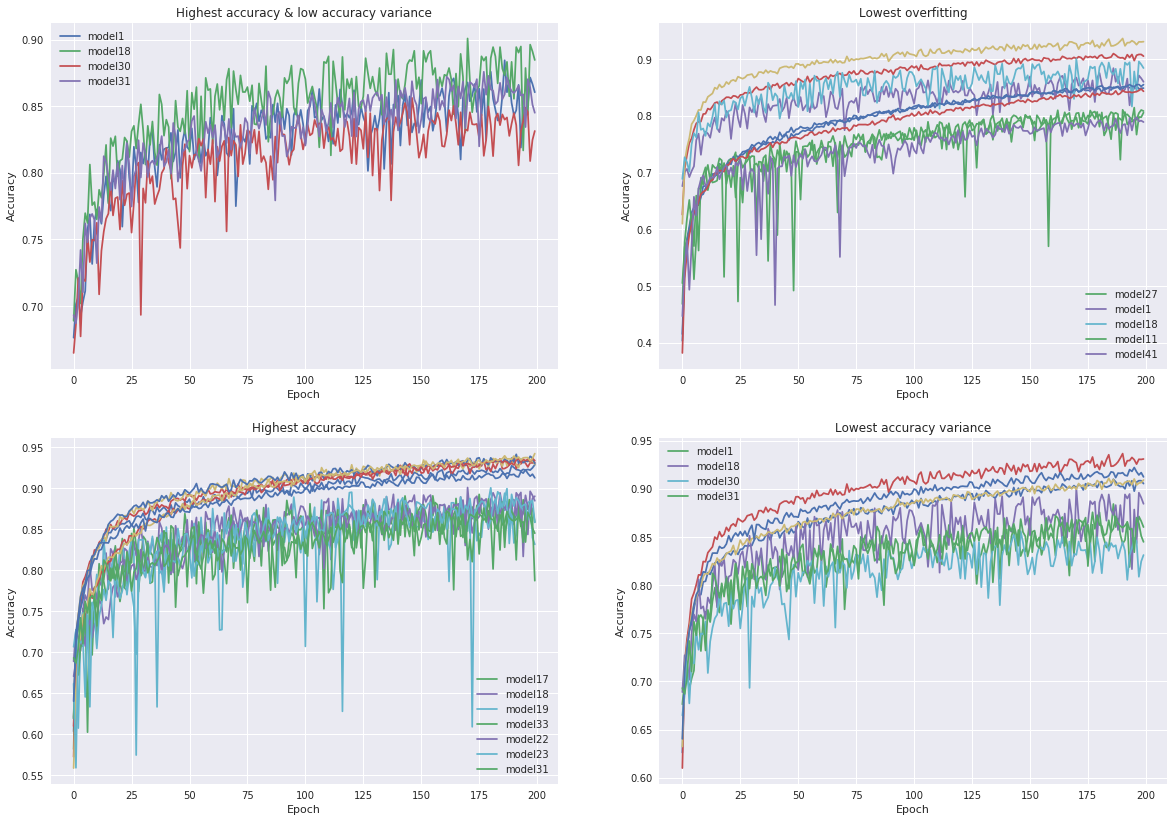

In [249]:
# all models
models = {idx:i for idx,i in enumerate(hists)}
# high validation accuracy variance models
high_variance = {idx:i for idx,i in enumerate(hists) if np.var(i['history']['val_acc']) > 0.003}
# low validation accuracy variance models
low_variance = {idx:i for idx,i in enumerate(hists) if np.var(i['history']['val_acc']) < 0.0013}
# highest mean validation accuracy models
high_acc = {idx:i for idx,i in enumerate(hists) if np.mean(i['history']['val_acc']) > 0.83}
# high validation accuracy and low validation accuracy variance
high_acc_low_variance = {idx:i for idx, i in enumerate(hists) if np.mean(i['history']['val_acc']) > 0.80 and np.var(i['history']['val_acc']) < 0.0013}
# low mean distance between training and validation accuracy
low_overfitting = {idx:hist for idx,hist in enumerate(hists) if np.mean(np.array(hist['history']['acc']) - np.array(hist['history']['val_acc'])) < 0.05} 

plt.figure(1, figsize=(20, 14))

plt.subplot(221)
plt.title('Highest accuracy & low accuracy variance')
for idx, i in high_acc_low_variance.items():
    hist = i['history']
#     plt.plot(hist['acc'])
    plt.plot(hist['val_acc'], label='model{}'.format(idx))
#     plt.plot(*fit(hist['val_acc'], grade=7))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.subplot(222)
plt.title('Lowest overfitting')
for idx, i in low_overfitting.items():
    hist = i['history']
    plt.plot(hist['acc'])
    plt.plot(hist['val_acc'], label='model{}'.format(idx))
#     plt.plot(*fit(hist['val_acc'], grade=7))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.subplot(223)
plt.title('Highest accuracy')
for idx,i in high_acc.items():
    hist = i['history']
    plt.plot(hist['acc'])
    plt.plot(hist['val_acc'], label='model{}'.format(idx))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
plt.subplot(224)
plt.title('Lowest accuracy variance')
for idx, i in low_variance.items():
    hist = i['history']
    plt.plot(hist['acc'])
    plt.plot(hist['val_acc'], label='model{}'.format(idx))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    

/home/ubuntu/data/installs/miniconda3/envs/dl-python35/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


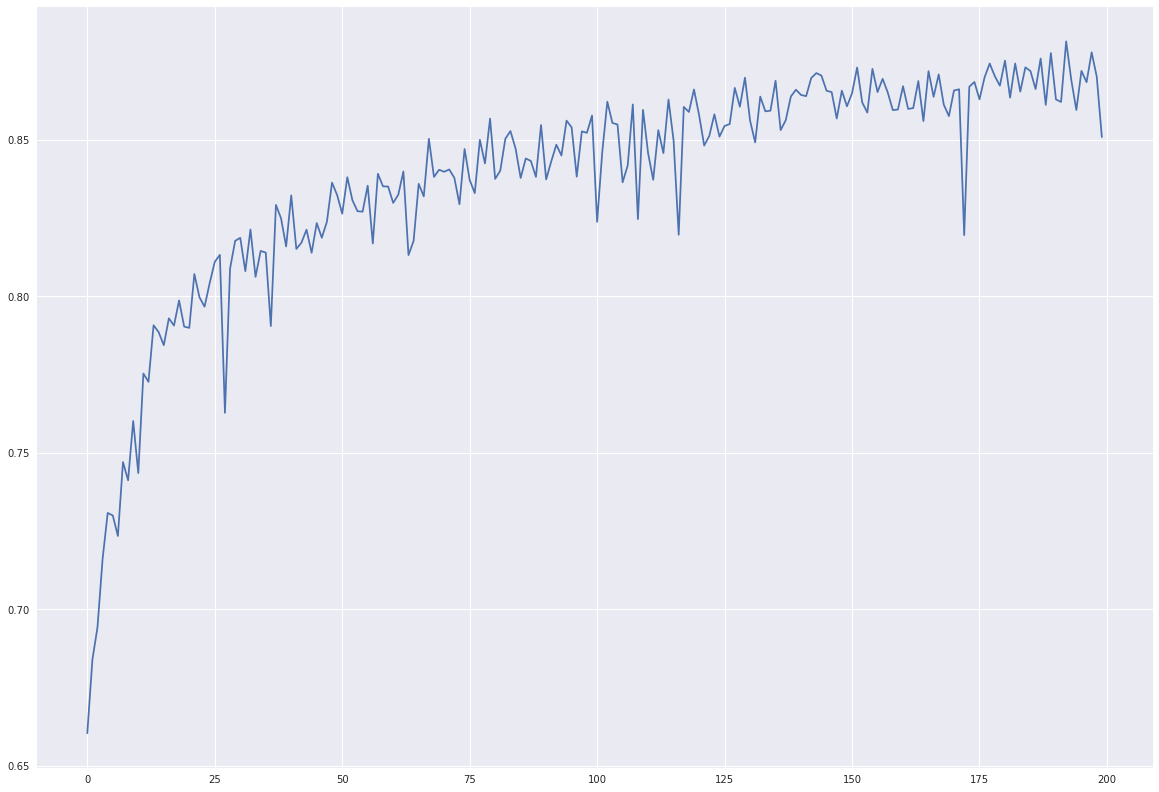

In [252]:
component_models = [i['history']['val_acc'] for i in hists if np.mean(i['history']['val_acc']) > 0.83]
ensemble = np.mean(np.array(component_models), axis = 0)

plt.figure(1, figsize=(20, 14))
plt.plot(ensemble)
# plt.plot(*fit(ensemble, grade=4))


In [253]:
def gen_epoch_to(hists, acc):
    for hist in hists:
        where = np.where(np.array(hist['history']['val_acc']) > acc)
        if len(where[0]) > 0:
            yield where[0][0]
        else:
            yield None
            
            
df = pd.DataFrame([hist['hyperparameters'] for hist in hists])
df.columns = ['learning_rate', 'seq_size', 'batch_size', 'epochs']
df['val_acc_variance'] = [np.var(hist['history']['val_acc']) for hist in hists]
df['val_acc_max'] = [np.max(hist['history']['val_acc']) for hist in hists]
df['acc_max'] = [np.max(hist['history']['acc']) for hist in hists]
df['epoch_to_70'] = [i for i in gen_epoch_to(hists, 0.7)]
df['epoch_to_75'] = [i for i in gen_epoch_to(hists, 0.75)]
df['epoch_to_80'] = [i for i in gen_epoch_to(hists, 0.8)]
df['mean_overfitting'] = \
    [np.mean(np.array(hist['history']['acc']) - np.array(hist['history']['val_acc'])) for hist in hists]
df[df.val_acc_max > 0.9]

,learning_rate,seq_size,batch_size,epochs,val_acc_variance,val_acc_max,acc_max,epoch_to_70,epoch_to_75,epoch_to_80,mean_overfitting
18,0.00010,300.0,30.0,200.0,0.001269,0.900785,0.936780,1,4,7.0,0.047456
19,0.00010,350.0,30.0,200.0,0.002901,0.900431,0.936746,0,6,13.0,0.067650
24,0.00001,350.0,30.0,200.0,0.006437,0.906889,0.944847,1,6,22.0,0.072716


In [3]:
with open('model/model_simple.hist',"rb") as f:
    hist = pickle.load(f)

/home/ubuntu/data/installs/miniconda3/envs/dl-python35/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


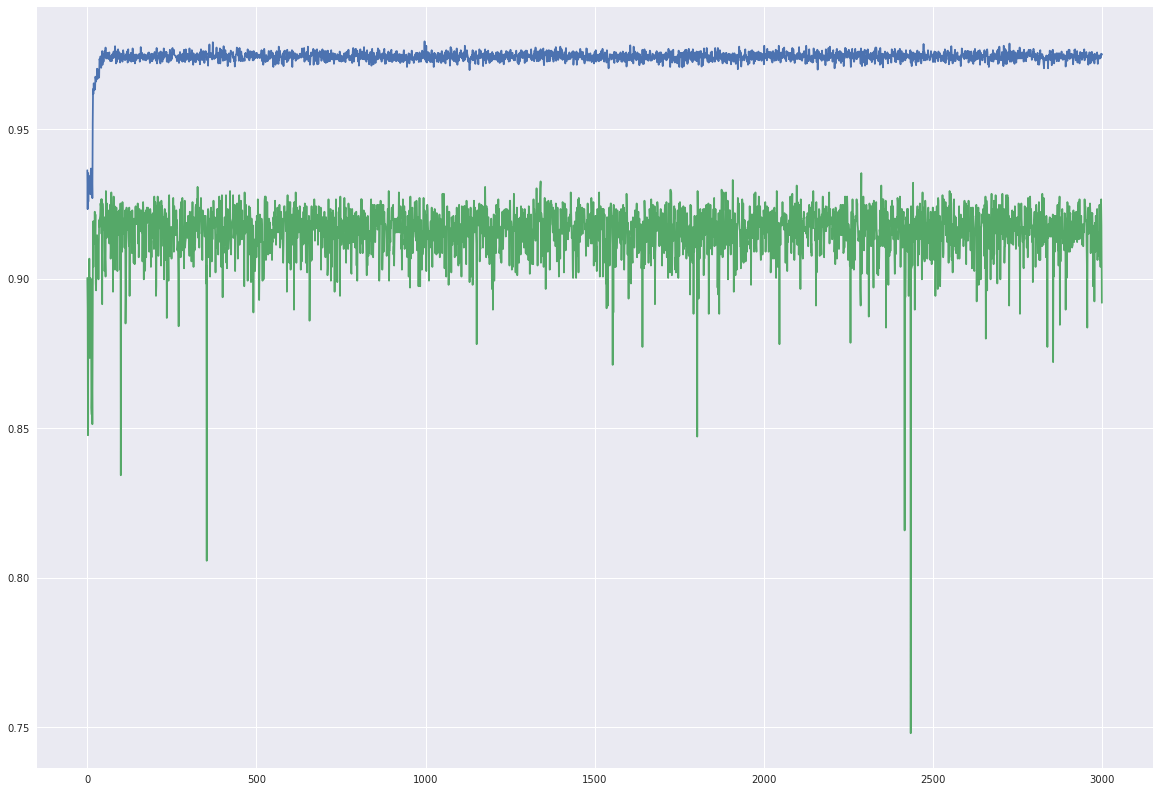

In [4]:
plt.figure(1, figsize=(20, 14))
plt.plot(hist['history']['acc'])
plt.plot(hist['history']['val_acc'])